In [3]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import seaborn as sns
from requests import Request, Session


In [4]:
%matplotlib inline
import seaborn; seaborn.set()
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import requests

In [144]:
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=15&page=1&sparkline=false"
top_15_coins = pd.read_json(url)

In [145]:
5_crypto = top_15_coins.set_index("id")[["name", "symbol", 'current_price', 'market_cap', 'total_volume', "ath"]]top_1

In [148]:
top_15_crypto.head(3)

,name,symbol,current_price,market_cap,total_volume,ath
id,,,,,,
bitcoin,Bitcoin,btc,63347.00,1192994095166,33978180244,67277.00
ethereum,Ethereum,eth,4161.54,490661992869,17529193806,4361.18
binancecoin,Binance Coin,bnb,486.66,81775001465,1360976875,686.31


In [137]:
import squarify

In [139]:
import plotly.express as px
fig=px.treemap(top_25_crypto,path=["name"],values="market_cap",hover_name="name",
title="Capitalización de Mercado del Top 15 de Cryptomonedas")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.show()

In [ ]:
csv200 = top_200_coins.to_csv("EDA.csv")

In [20]:
url_btc = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_eth = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_bnc = "https://api.coingecko.com/api/v3/coins/binancecoin/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_ada = "https://api.coingecko.com/api/v3/coins/cardano/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_sol = "https://api.coingecko.com/api/v3/coins/solana/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_xrp = "https://api.coingecko.com/api/v3/coins/ripple/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_usdt = "https://api.coingecko.com/api/v3/coins/tether/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_doge = "https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_dot = "https://api.coingecko.com/api/v3/coins/polkadot/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_usdc = "https://api.coingecko.com/api/v3/coins/usd-coin/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_terra = "https://api.coingecko.com/api/v3/coins/terra-luna/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"
url_ltc = "https://api.coingecko.com/api/v3/coins/litecoin/market_chart/range?vs_currency=usd&from=1493593200&to=1634943600"

In [21]:
data_btc = requests.get(url_btc).json()
data_eth = requests.get(url_eth).json()
data_bnc = requests.get(url_bnc).json()
data_ada = requests.get(url_ada).json()
data_sol = requests.get(url_sol).json()
data_xrp = requests.get(url_xrp).json()
data_usdt = requests.get(url_usdt).json()
data_xrp = requests.get(url_xrp).json()
data_doge = requests.get(url_doge).json()
data_dot = requests.get(url_dot).json()
data_usdc = requests.get(url_usdc).json()
data_terra = requests.get(url_terra).json()
data_ltc = requests.get(url_ltc).json()


In [22]:
def fix_df_coingecko(df):
    df["Dates"] = df["prices"]
    df["prices"] = df["prices"].apply(lambda x: x[1])
    df["market_caps"] = df["market_caps"].apply(lambda x: x[1])
    df["total_volumes"] = df["total_volumes"].apply(lambda x: x[1])
    df["Dates"] = df["Dates"].apply(lambda x: x[0])
    df["Dates"] = pd.to_datetime(df["Dates"], unit='ms')
    df = df.iloc[::-1]
    

In [23]:
hist_btc = pd.DataFrame(data_btc)
hist_eth = pd.DataFrame(data_eth)
hist_bnc = pd.DataFrame(data_bnc)
hist_ada = pd.DataFrame(data_ada)
hist_sol = pd.DataFrame(data_sol)
hist_xrp = pd.DataFrame(data_xrp)
hist_usdt = pd.DataFrame(data_usdt)
hist_doge = pd.DataFrame(data_doge)
hist_dot = pd.DataFrame(data_dot)
hist_ltc = pd.DataFrame(data_ltc)
hist_usdc = pd.DataFrame(data_usdc)
hist_terra = pd.DataFrame(data_terra)



In [24]:
data_frames = [hist_btc,hist_eth,hist_bnc,hist_ada,hist_usdt,hist_sol,hist_xrp,hist_dot,hist_doge,hist_usdc,hist_terra,hist_ltc]

In [25]:
for i in data_frames:
    fix_df_coingecko(i)

In [ ]:
#for i in data_frames:    #no aplicaba el index a cada una de las tablas
#    i = i.set_index("Dates")
#for i in data_frames:
#    i = i.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'})

In [26]:
hist_btc = hist_btc.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_eth = hist_eth.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_bnc = hist_bnc.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_ada = hist_ada.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_sol = hist_sol.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_xrp = hist_xrp.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_usdt = hist_usdt.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_doge = hist_doge.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_dot = hist_dot.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_ltc = hist_ltc.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_usdc = hist_usdc.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])
hist_terra = hist_terra.rename(columns={'prices': 'Prices', 'market_caps': 'Market_Cap','total_volumes': 'Total_Volume'}).iloc[::-1].set_index(["Dates"])

In [31]:
print(hist_btc["Total_Volume"][0])
print(hist_btc["Prices"][0])
print(hist_btc["Market_Cap"][0])

48709960685.53348
62541.08693293518
1178926819140.8179


In [ ]:
#for i in data_frames:
#    i = i.iloc[::-1]

In [86]:
import plotly.graph_objs as go

trace1 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Bitcoin"]['Market_Cap'],name = 'Bitcoin MC',mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
                  
trace2 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Ethereum"]['Market_Cap'],name = 'Ethereum MC',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))
                    
trace3 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Binance Coin"]['Market_Cap'],name = 'Binance Coin MC',mode= 'lines',
                    marker = dict(color = 'rgba(255, 110, 13, 0.8)'))

trace4 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Cardano"]['Market_Cap'],name = 'Cardano MC',mode= 'lines',
                    marker = dict(color = 'rgba(255, 0, 13, 0.8)'))

trace5 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Tether"]['Market_Cap'],name = 'Tether MC',mode= 'lines',
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'))

trace6 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Ripple"]['Market_Cap'],name = 'Ripple MC',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))

trace7 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Solana"]['Market_Cap'],name = 'Solana MC',mode= 'lines',
                    marker = dict(color = 'rgba(89, 255, 196, 0.95)'))
                   
trace8 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Dogecoin"]['Market_Cap'],name = 'Dogecoin MC',mode= 'lines',
                    marker = dict(color = 'rgba(227, 232, 0, 0.9)'))

trace9 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["USD Coin"]['Market_Cap'],name = 'USD Coin',mode= 'lines',
                    marker = dict(color = 'rgba(81, 52, 0, 0.95)')) 

trace10 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Litecoin"]['Market_Cap'],name = 'Litecoin',mode= 'lines',
                    marker = dict(color = 'rgba(181, 244, 0, 0.95)'))

trace11 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Terra"]['Market_Cap'],name = 'Terra',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))          

trace12 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Polkadot"]['Market_Cap'],name = 'Polkadot',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))         
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = dict(title = 'Capitalizacion de mercado de las top 12 Criptomonedas 05/2017-10/2021',xaxis= dict(title= 'World Rank',ticklen= 5))
           

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [67]:
xrp_mensual = tabla_crypto["Ripple"].resample("1M").last()
xrp_mensual = xrp_mensual.pct_change()
xrp_mensual = xrp_mensual*100
def trp(l,n):
    return l[:n] + [None] * (n-len(l))
z_vals = [list(xrp_mensual["Prices"].iloc[::-1])[i: i+12] for i in range(0,len(btc_mensual),12)]
z_vals = [trp(x,12)for x in z_vals]
months = ["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr"]
years = [str(x) for x in range(2017,2022)]
import plotly.graph_objects as go

layout = go.Layout(title = 'Estacionalidad - Precio del Ripple  2017-2021')

fig = go.Figure(data=go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0), layout=layout)
fig.show()

In [68]:
ltc_mensual = tabla_crypto["Litecoin"].resample("1M").last()
ltc_mensual = ltc_mensual.pct_change()
ltc_mensual = ltc_mensual*100
def trp(l,n):
    return l[:n] + [None] * (n-len(l))
z_vals = [list(ltc_mensual["Prices"].iloc[::-1])[i: i+12] for i in range(0,len(btc_mensual),12)]
z_vals = [trp(x,12)for x in z_vals]
months = ["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr"]
years = [str(x) for x in range(2017,2022)]
import plotly.graph_objects as go

layout = go.Layout(title = 'Estacionalidad - Precio del Litecoin  2017-2021')

fig = go.Figure(data=go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0), layout=layout)
fig.show()

In [53]:
tabla_crypto["Ethereum"]["Prices"]

Dates
2017-05-01      76.846178
2017-05-02      77.346044
2017-05-03      80.929492
2017-05-04      94.112265
2017-05-05      91.160387
                 ...     
2021-10-18    3854.223687
2021-10-19    3752.618727
2021-10-20    3884.587295
2021-10-21    4170.107933
2021-10-22    4074.860158
Name: Prices, Length: 1650, dtype: float64

In [69]:
eth_mensual = tabla_crypto["Ethereum"].resample("1M").last()
eth_mensual = eth_mensual.pct_change()
eth_mensual = eth_mensual*100
def trp(l,n):
    return l[:n] + [None] * (n-len(l))
z_vals = [list(eth_mensual["Prices"].iloc[::-1])[i: i+12] for i in range(0,len(btc_mensual),12)]
z_vals = [trp(x,12)for x in z_vals]
months = ["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr"]
years = [str(x) for x in range(2017,2022)]
import plotly.graph_objects as go

layout = go.Layout(title = 'Estacionalidad - Precio del Ethereum  2017-2021')

fig = go.Figure(data=go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0), layout=layout)
fig.show()

In [70]:
btc_mensual = tabla_crypto["Bitcoin"]
btc_mensual = tabla_crypto["Bitcoin"].resample("1M").last()
btc_mensual = btc_mensual.pct_change()
btc_mensual = btc_mensual*100
def trp(l,n):
    return l[:n] + [None] * (n-len(l))
z_vals = [list(btc_mensual["Prices"].iloc[::-1])[i: i+12] for i in range(0,len(btc_mensual),12)]
z_vals = [trp(x,12)for x in z_vals]
months = ["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr"]
years = [str(x) for x in range(2017,2022)]
import plotly.graph_objects as go

layout = go.Layout(title = 'Estacionalidad - Precio del Bitcoin 2017-2021')

fig = go.Figure(data=go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0), layout=layout)
fig.show()

In [ ]:
trace1 = go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0)

trace2 = go.Heatmap(z=z_vals2,x=months,y=years,zmax=100,zmin=0)

trace3 = go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0)

trace4 = go.Heatmap(z=z_vals,x=months,y=years,zmax=100,zmin=0)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
trace1 = go.heatmap(z=z_vals,x=months,y=years)
fig = go.Figure(data = trace1)

fig.show()

TypeError: 'module' object is not callable

In [ ]:
trace1 = go.Scatter(x = btc_mensual.index,y = btc_mensual["Prices"],name = 'Tether',mode= 'lines',
                    marker = dict(color = 'rgba(181, 244, 0, 0.95)'))    
trace2 = go.Scatter(x = btc_mensual.index,y = btc_mensual["Total_Volume"],name = 'Ethereum MC',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))     
data = [trace1,trace2]

layout = dict(title = 'Hola Fran',xaxis= dict(title= 'World Rank',ticklen= 5))
           

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [ ]:
trace1 = go.Scatter(x = hist_btc['Dates'],y = hist_usdt['Prices'],name = 'Tether',mode= 'lines',
                    marker = dict(color = 'rgba(181, 244, 0, 0.95)'))

trace2 = go.Scatter(x = hist_btc['Dates'],y = hist_usdc['Prices'],name = 'USD Coin',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))           
trace3 = go.Scatter(x = hist_btc['Dates'],y = hist_xrp['Prices'],name = 'Ripp',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))          
data = [trace1, trace2, trace3]

layout = dict(title = 'Hola Fran',xaxis= dict(title= 'World Rank',ticklen= 5))
           

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [ ]:
hist_sol

,Prices,Market_Cap,Total_Volume,Dates
0,0.957606,7.827652e+06,9.267267e+07,2020-04-11
1,0.784711,6.173608e+06,4.945869e+07,2020-04-12
2,0.875994,7.269680e+06,3.782101e+07,2020-04-13
3,0.786712,6.302364e+06,1.957921e+07,2020-04-14
4,0.666673,5.306221e+06,1.752353e+07,2020-04-15
...,...,...,...,...
555,159.863492,4.791902e+10,2.132944e+09,2021-10-18
556,157.375325,4.724386e+10,1.619036e+09,2021-10-19
557,156.390681,4.699256e+10,1.345984e+09,2021-10-20
558,175.601956,5.233697e+10,3.069127e+09,2021-10-21


In [32]:
hist_btc

,Prices,Market_Cap,Total_Volume
Dates,,,
2021-10-22,62541.086933,1.178927e+12,4.870996e+10
2021-10-21,66237.517550,1.250376e+12,4.079076e+10
2021-10-20,64517.648560,1.217583e+12,4.255062e+10
2021-10-19,62017.972725,1.173945e+12,3.961018e+10
2021-10-18,61583.774440,1.160650e+12,2.962596e+10
...,...,...,...
2017-05-05,1506.043800,2.456740e+10,3.243146e+08
2017-05-04,1499.360000,2.445591e+10,3.350174e+08
2017-05-03,1485.817500,2.423194e+10,2.061546e+08


C:\Users\piero\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Dates', ylabel='Prices'>

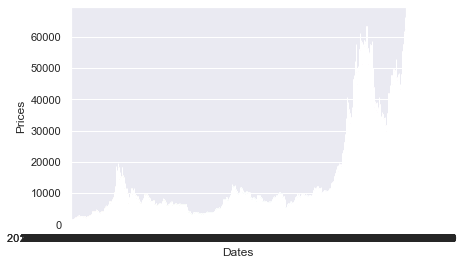

In [ ]:
sns.barplot(hist_btc.index, hist_btc["Prices"])

In [ ]:
ethereum = hist_eth.to_csv("Ethereum.csv")

In [ ]:
cardano = hist_ada.to_csv("Cardano.csv")

In [ ]:
hist_btc.head(2)

,Prices,Market_Cap,Total_Volume
Dates,,,
2017-05-01,1408.445,2.296473e+10,2.177600e+08
2017-05-02,1442.245,2.351894e+10,1.891607e+08


In [ ]:
hist_usdc.head(2)

,Prices,Market_Cap,Total_Volume
Dates,,,
2018-10-05,1.006242,0.0,31264.420430
2018-10-06,1.001530,0.0,20254.712255


In [ ]:
hist_dot

,prices,market_caps,total_volumes,Dates
0,2.936665,0.000000e+00,8.241398e+07,2020-08-19
1,2.936665,0.000000e+00,8.241398e+07,2020-08-20
2,2.898791,0.000000e+00,4.951174e+07,2020-08-21
3,2.871923,0.000000e+00,5.123375e+07,2020-08-22
4,4.481389,4.028277e+09,4.739210e+08,2020-08-23
...,...,...,...,...
425,42.129946,4.374293e+10,1.678390e+09,2021-10-18
426,41.141524,4.277700e+10,1.670188e+09,2021-10-19
427,41.420230,4.317239e+10,1.362587e+09,2021-10-20
428,44.553240,4.650274e+10,2.051643e+09,2021-10-21


In [ ]:
for i in data_frames: #chequeamos que todos los valores son diferentes solo para evitar tener alguna tabla copiada erroneamente
        print(i["prices"][0])

1408.445
76.84617780144701
0.10725062436515388
0.02684535467621909
0.935988
0.9576058280146803
0.053275
2.9366649977840584
0.0006835309001224953
1.0062418761688314
3.2699771961339086
15.895430853776919


In [ ]:
#chequeamos que no tenga valores nulos, al crear el merge, si habran valores nulos, 
# ya que no todas las monedas existian desde Mayo 2017
for i in data_frames: 
    print(i.isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False


In [83]:
tabla_crypto = pd.concat({"Bitcoin":hist_btc, "Ethereum":hist_eth, "Binance Coin":hist_bnc,"Cardano":hist_ada,"Tether":hist_usdt,"Solana":hist_sol,"Polkadot":hist_dot,"Ripple":hist_xrp,"Dogecoin":hist_doge,"USD Coin":hist_usdc,"Terra":hist_terra,"Litecoin":hist_ltc}, axis=1)

In [140]:
tabla_crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1652 entries, 2017-05-01 00:00:00 to 2021-10-22 00:00:00
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Bitcoin, Prices)             1636 non-null   float64
 1   (Bitcoin, Market_Cap)         1636 non-null   float64
 2   (Bitcoin, Total_Volume)       1636 non-null   float64
 3   (Ethereum, Prices)            1636 non-null   float64
 4   (Ethereum, Market_Cap)        1636 non-null   float64
 5   (Ethereum, Total_Volume)      1636 non-null   float64
 6   (Binance Coin, Prices)        1496 non-null   float64
 7   (Binance Coin, Market_Cap)    1496 non-null   float64
 8   (Binance Coin, Total_Volume)  1496 non-null   float64
 9   (Cardano, Prices)             1466 non-null   float64
 10  (Cardano, Market_Cap)         1466 non-null   float64
 11  (Cardano, Total_Volume)       1466 non-null   float64
 12  (Tether, Prices)          

In [141]:
tabla_crypto

Bitcoin                                 Ethereum  \
                  Prices    Market_Cap  Total_Volume       Prices   
Dates                                                               
2017-05-01   1408.445000  2.296473e+10  2.177600e+08    76.846178   
2017-05-02   1442.245000  2.351894e+10  1.891607e+08    77.346044   
2017-05-03   1485.817500  2.423194e+10  2.061546e+08    80.929492   
2017-05-04   1499.360000  2.445591e+10  3.350174e+08    94.112265   
2017-05-05   1506.043800  2.456740e+10  3.243146e+08    91.160387   
...                  ...           ...           ...          ...   
2021-10-18  61583.774440  1.160650e+12  2.962596e+10  3854.223687   
2021-10-19  62017.972725  1.173945e+12  3.961018e+10  3752.618727   
2021-10-20  64517.648560  1.217583e+12  4.255062e+10  3884.587295   
2021-10-21  66237.517550  1.250376e+12  4.079076e+10  4170.107933   
2021-10-22  62541.086933  1.178927e+12  4.870996e+10  4074.860158   

                                       Binance Coin                \
              Market_Cap  Total_Volume       Prices    Market_Cap   
Dates                                                               
2017-05-01  7.010408e+09  2.901263e+08          NaN           NaN   
2017-05-02  7.058414e+09  1.387949e+08          NaN           NaN   
2017-05-03  7.387794e+09  1.151840e+08          NaN           NaN   
2017-05-04  8.594013e+09  2.699289e+08          NaN           NaN   
2017-05-05  8.327157e+09  2.337984e+08          NaN           NaN   
...                  ...           ...          ...           ...   
2021-10-18  4.531912e+11  1.726317e+10   470.603742  7.905827e+10   
2021-10-19  4.433469e+11  1.893108e+10   484.962831  8.188559e+10   
2021-10-20  4.576536e+11  1.744961e+10   488.575870  8.201198e+10   
2021-10-21  4.915898e+11  2.192638e+10   503.122639  8.474512e+10   
2021-10-22  4.815285e+11  5.012217e+10   472.693206  7.962457e+10   

                           Cardano  ...      Dogecoin  USD Coin                \
            Total_Volume    Prices  ...  Total_Volume    Prices    Market_Cap   
Dates                               ...                                         
2017-05-01           NaN       NaN  ...  3.357178e+06       NaN           NaN   
2017-05-02           NaN       NaN  ...  3.324582e+06       NaN           NaN   
2017-05-03           NaN       NaN  ...  2.479327e+06       NaN           NaN   
2017-05-04           NaN       NaN  ...  2.577970e+06       NaN           NaN   
2017-05-05           NaN       NaN  ...  4.226903e+06       NaN           NaN   
...                  ...       ...  ...           ...       ...           ...   
2021-10-18  1.637429e+09  2.157823  ...  1.339251e+09  1.002153  3.282991e+10   
2021-10-19  1.999076e+09  2.128426  ...  4.425113e+09  1.000386  3.282288e+10   
2021-10-20  1.825140e+09  2.115809  ...  1.653402e+09  0.999576  3.228445e+10   
2021-10-21  1.833543e+09  2.193572  ...  1.734041e+09  1.002976  3.248716e+10   
2021-10-22  3.033091e+09  2.145294  ...  1.710215e+09  1.004367  3.241638e+10   

                              Terra                                Litecoin  \
            Total_Volume     Prices    Market_Cap  Total_Volume      Prices   
Dates                                                                         
2017-05-01           NaN        NaN           NaN           NaN   15.895431   
2017-05-02           NaN        NaN           NaN           NaN   16.023527   
2017-05-03           NaN        NaN           NaN           NaN   21.172688   
2017-05-04           NaN        NaN           NaN           NaN   23.365207   
2017-05-05           NaN        NaN           NaN           NaN   26.199396   
...                  ...        ...           ...           ...         ...   
2021-10-18  1.969205e+09  36.259851  1.452796e+10  4.871190e+08  183.599868   
2021-10-19  2.813746e+09  35.787811  1.443149e+10  5.092234e+08  185.533037   
2021-10-20  2.664906e+09  37.794607  1.521596e+10  5.957820e+08  188.962532   


In [ ]:
trace1 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Bitcoin"]['Prices'],name = 'Tether',mode= 'lines',
                    marker = dict(color = 'rgba(181, 244, 0, 0.95)'))

trace2 = go.Scatter(x = tabla_crypto.index,y = tabla_crypto["Ethereum"]['Prices'],name = 'USD Coin',mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))           

data = [trace1, trace2]

layout = dict(title = 'Hola Fran',xaxis= dict(title= 'World Rank',ticklen= 5))
           

fig = go.Figure(data = data, layout=layout)

iplot(fig)

<AxesSubplot:xlabel='Prices', ylabel='Count'>

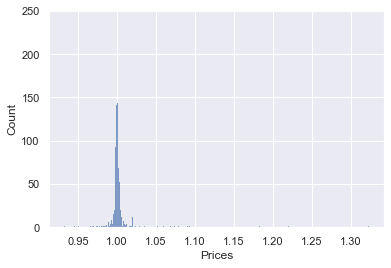

In [ ]:
sns.histplot(hist_usdt["Prices"])

In [ ]:
tabla_crypto["Bitcoin"]["Prices"]

Dates
2017-05-01     1408.445000
2017-05-02     1442.245000
2017-05-03     1485.817500
2017-05-04     1499.360000
2017-05-05     1506.043800
                  ...     
2021-10-18    61583.774440
2021-10-19    62017.972725
2021-10-20    64517.648560
2021-10-21    66237.517550
2021-10-22    62541.086933
Name: Prices, Length: 1650, dtype: float64

In [ ]:
type(tabla_crypto["Bitcoin"]["Prices"][])

numpy.float64

In [ ]:
sns.catplot(x=tabla_crypto["Bitcoin"]["Prices"])

TypeError: object of type 'NoneType' has no len()

In [ ]:
tabla_crypto.to_csv("tablacrypto1.csv")

In [ ]:
prueba = pd.read_csv("Prueba.csv")

In [ ]:
prueba

,Unnamed: 0,Bitcoin,Unnamed: 2,Unnamed: 3,Ethereum,Unnamed: 5,Unnamed: 6,Cardano,Unnamed: 8,Unnamed: 9
0,Dates,Prices_BTC,Market_Cap_BTC,Total_Volume_BTC,Prices_ETH,Market_Cap_ETH,Total_Volume_ETH,Prices_ADA,Market_Cap_ADA,Total_Volume_ADA
1,18-10-17,5592.782224,93017336299,2100240730,314.4565542,29930081748,459286354.3,0.026845355,696021404.3,2351678.122
2,19-10-17,5696.380141,94752516352,1229468606,308.4746839,29366946307,251750069.6,0.02682995,695622018.3,2815155.97
3,20-10-17,5952.771359,99030673397,1843078157,302.3564969,28790749977,270984513,0.030299606,785580027.6,8883473.082
4,21-10-17,6043.966731,1.00559E+11,1763987337,300.693846,28638437009,291385148.3,0.028587963,741202123.9,5308856.917
...,...,...,...,...,...,...,...,...,...,...
1460,18-10-21,61583.77444,1.16065E+12,29625957542,3854.223687,4.53191E+11,17263171427,2.157822754,69142581315,1425207571
1461,19-10-21,62017.97273,1.17394E+12,39610183787,3752.618727,4.43347E+11,18931081929,2.128425798,68608888299,1472254044
1462,20-10-21,64517.64856,1.21758E+12,42550624869,3884.587295,4.57654E+11,17449609318,2.115808715,67789450192,1505341304
1463,21-10-21,66237.51755,1.25038E+12,40790757382,4170.107933,4.9159E+11,21926381355,2.193571637,70402677878,1964178911


In [9]:
url_categorias = "https://api.coingecko.com/api/v3/coins/categories"
categorias_crypto = pd.read_json(url_categorias)

In [11]:
categorias_crypto = pd.DataFrame(categorias_crypto)

In [17]:
categorias_crypto[["name","market_cap"]].head(20)

,name,market_cap
0,Smart Contract Platform,7.711695e+11
1,Decentralized Finance (DeFi),1.501915e+11
2,Exchange-based Tokens,1.475349e+11
3,Stablecoins,1.349396e+11
4,Binance Smart Chain Ecosystem,1.131933e+11
5,Centralized Exchange Token (CEX),1.105203e+11
6,Solana Ecosystem,9.420730e+10
7,Polkadot Ecosystem,7.299818e+10
8,Meme Tokens,6.016963e+10
9,Polygon Ecosystem,5.902300e+10
